In [1]:
import sys
import os
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from scipy.stats import pearsonr, spearmanr

/home/bonsai/.pyenv/versions/3.8.5/envs/wcEcoli3/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
import base64
import io

def plt2base64(plt):
    pic_IObytes = io.BytesIO()
    plt.savefig(pic_IObytes,  format='png')
    pic_IObytes.seek(0)
    pic_hash = base64.b64encode(pic_IObytes.read())
    return bytes.decode(pic_hash) # convert bytes to string

def plt2html(plt):
    '''
    output an HTML img tag
    '''
    return '<img src="data:image/.png;base64,' + plt2base64(plt) + '">'

In [3]:
import matplotlib.pyplot as plt

def visualize_matrix(dm, cmap = None, silent = False):

    fig = plt.figure(figsize = (3,3))
    if cmap is None:
        plt.imshow(dm)
    else:
        plt.imshow(dm, cmap = cmap)

    cur_axes = plt.gca()
    cur_axes.axes.get_xaxis().set_visible(False)
    cur_axes.axes.get_yaxis().set_visible(False) 

    fig.tight_layout()
        
    s = plt2html(plt) # must appear before plt.show()

    if (silent == False):
        plt.show()
    return s

In [76]:
Big_data_set = pd.read_csv('r\home\bonsai\wholecell3\cvreliabledataset.csv')
Big_data_set

,charged-valU-tRNA[c],charged-lysT-tRNA[c],charged-alaW-tRNA[c],RNA0-312[c],charged-thrW-tRNA[c],RNA0-309[c],charged-serV-tRNA[c],RNA0-323[c],charged-alaV-tRNA[c],charged-glnU-tRNA[c],...,EG10346-MONOMER[c],G6995-MONOMER[c],CPLX0-3501[c],CYTOCHROME-B561-MONOMER[i],CPLX-3942[c],GLUCDEHYDROG-MONOMER[m],CPLX0-8248[c],G378-MONOMER[c],RED-THIOREDOXIN2-MONOMER[c],EG12128-MONOMER[i]
0,2296,3030,2704,8799,5813,4484,8810,6897,6569,3098,...,621,658,388,1218,37,447,209,866,719,292
1,1939,2621,2276,7732,5061,3850,7872,5906,5715,2783,...,419,991,243,725,34,806,155,654,593,265
2,1979,2775,2407,7996,5327,4120,7989,6317,6205,2680,...,371,495,497,1055,60,951,148,821,511,289
3,2116,2827,2467,8058,5405,4081,8306,6334,6241,2894,...,558,719,316,1780,36,598,256,661,1180,320
4,2006,2673,2423,7974,5213,3865,7875,6297,5813,2768,...,537,375,216,1227,35,746,188,1199,966,360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2065,1899,2568,2334,7538,4873,3727,7512,5711,5720,2637,...,261,566,234,1926,29,474,135,572,661,264
2066,1936,2605,2261,7703,5029,3825,7594,5807,5634,2654,...,404,843,333,1036,38,348,103,415,978,403
2067,2069,2796,2446,7954,5119,3840,7946,6076,5965,2813,...,552,497,202,1142,27,739,155,1049,463,419
2068,1938,2604,2358,7513,4937,3736,7460,5735,5684,2663,...,318,891,257,1066,52,315,171,401,781,353


In [77]:
Big_data_set = Big_data_set.iloc[:, : 1422]
Big_data_set

,charged-valU-tRNA[c],charged-lysT-tRNA[c],charged-alaW-tRNA[c],RNA0-312[c],charged-thrW-tRNA[c],RNA0-309[c],charged-serV-tRNA[c],RNA0-323[c],charged-alaV-tRNA[c],charged-glnU-tRNA[c],...,G6567-MONOMER[c],EG10346-MONOMER[c],G6995-MONOMER[c],CPLX0-3501[c],CYTOCHROME-B561-MONOMER[i],CPLX-3942[c],GLUCDEHYDROG-MONOMER[m],CPLX0-8248[c],G378-MONOMER[c],RED-THIOREDOXIN2-MONOMER[c]
0,2296,3030,2704,8799,5813,4484,8810,6897,6569,3098,...,173,621,658,388,1218,37,447,209,866,719
1,1939,2621,2276,7732,5061,3850,7872,5906,5715,2783,...,289,419,991,243,725,34,806,155,654,593
2,1979,2775,2407,7996,5327,4120,7989,6317,6205,2680,...,573,371,495,497,1055,60,951,148,821,511
3,2116,2827,2467,8058,5405,4081,8306,6334,6241,2894,...,351,558,719,316,1780,36,598,256,661,1180
4,2006,2673,2423,7974,5213,3865,7875,6297,5813,2768,...,279,537,375,216,1227,35,746,188,1199,966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2065,1899,2568,2334,7538,4873,3727,7512,5711,5720,2637,...,334,261,566,234,1926,29,474,135,572,661
2066,1936,2605,2261,7703,5029,3825,7594,5807,5634,2654,...,240,404,843,333,1036,38,348,103,415,978
2067,2069,2796,2446,7954,5119,3840,7946,6076,5965,2813,...,411,552,497,202,1142,27,739,155,1049,463
2068,1938,2604,2358,7513,4937,3736,7460,5735,5684,2663,...,402,318,891,257,1066,52,315,171,401,781


In [78]:
from sklearn.preprocessing import StandardScaler
standardised_data = StandardScaler().fit_transform(Big_data_set)
standardised_data

array([[ 1.74751894,  1.35230472,  1.75077042, ...,  1.0767597 ,
         0.7967913 , -0.52388418],
       [-0.80633374, -0.80430646, -0.8339304 , ..., -0.06417097,
        -0.21507598, -1.0164615 ],
       [-0.52018778,  0.00771829, -0.0428187 , ..., -0.21206939,
         0.58200815, -1.3370277 ],
       ...,
       [ 0.12364063,  0.11844893,  0.19270311, ..., -0.06417097,
         1.67024278, -1.5246762 ],
       [-0.81348739, -0.89394556, -0.33873071, ...,  0.27388256,
        -1.42263459, -0.28150486],
       [ 2.28404261,  0.90938213,  1.45485841, ..., -0.31771112,
        -0.40122138,  0.72710585]])

### Quality metrics in 2D

In [79]:
from sklearn.decomposition import PCA, FastICA
from sklearn import manifold
import matplotlib.ticker as mticker
import umap
from sklearn.manifold import TSNE
from sklearn.manifold import SpectralEmbedding

import time

start = time.perf_counter()
# Generate PCA embedding
K = 2
pca = PCA(n_components = K) # keep the first K components
pca.fit(standardised_data)
pca_embedding = pd.DataFrame(pca.transform(standardised_data))

end = time.perf_counter()
print(f"Processed the PCA algorithm in {start-end:0.4f} seconds")

print(pca_embedding)

Processed the PCA algorithm in -0.3150 seconds
              0          1
0    -31.105744  -1.558897
1      8.948265   4.611052
2     -5.040635   6.463976
3     -8.107278   7.321192
4      8.139300  -7.188499
...         ...        ...
2065  20.264769   1.541057
2066  17.328797   6.141216
2067   4.156253  -2.926634
2068  20.984862   5.149424
2069 -36.224988  11.116835

[2070 rows x 2 columns]


In [11]:
import coranking
from coranking.metrics import trustworthiness, continuity, LCMC

Q1 = coranking.coranking_matrix(standardised_data, pca_embedding)
trust_pca = trustworthiness(Q1, min_k=1, max_k=500)
cont_pca = continuity(Q1, min_k=1, max_k=500)
lcmc_pca = LCMC(Q1, min_k=1, max_k=500)

Text(0.5, 0, 'Neighbours')

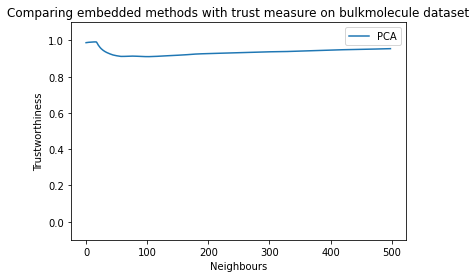

In [13]:
plt.plot(trust_pca, label = 'PCA')
plt.ylim(-0.1,1.1)
plt.legend()
plt.title('Comparing embedded methods with trust measure on bulkmolecule dataset')
plt.ylabel('Trustworthiness')
plt.xlabel('Neighbours')

Text(0.5, 0, 'Neighbours')

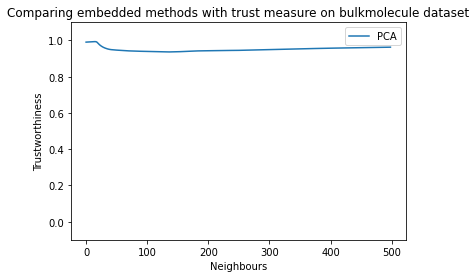

In [14]:
plt.plot(cont_pca, label = 'PCA')
plt.ylim(-0.1,1.1)
plt.legend()
plt.title('Comparing embedded methods with trust measure on bulkmolecule dataset')
plt.ylabel('Trustworthiness')
plt.xlabel('Neighbours')

Text(0.5, 0, 'Neighbours')

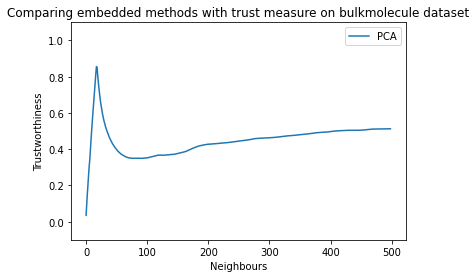

In [15]:
plt.plot(lcmc_pca, label = 'PCA')
plt.ylim(-0.1,1.1)
plt.legend()
plt.title('Comparing embedded methods with trust measure on bulkmolecule dataset')
plt.ylabel('Trustworthiness')
plt.xlabel('Neighbours')

In [16]:
AUC_T1 = np.mean(trust_pca)
AUC_C1 = np.mean(cont_pca)

print("AUC of PCA Trust = ", AUC_T1)
print("AUC of PCA Cont = ", AUC_C1)

AUC of PCA Trust =  0.9358628372143458
AUC of PCA Cont =  0.9512548032529464


In [68]:
m = len(Q1)
QNN1 = np.zeros(m)
for k in range(m):    
        QNN1[k] = np.sum(Q1[:k+1,:k+1])/((k+1) * m)
        
Plot_QNN1 = QNN1[range(1,2069)]
Plot_QNN1

array([0.10343161, 0.14902529, 0.20142581, ..., 0.99909718, 0.9995737 ,
       1.0000577 ])

Text(0.5, 0, 'Neighbours')

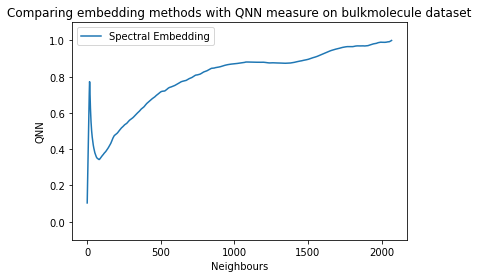

In [69]:
plt.plot(list(range(1, len(Plot_QNN1)+1)), Plot_QNN1, label = 'Spectral Embedding')
plt.ylim(-0.1,1.1)
plt.legend()
plt.title('Comparing embedding methods with QNN measure on bulkmolecule dataset')
plt.ylabel('QNN')
plt.xlabel('Neighbours')

In [18]:
AUC1 = np.mean(QNN1)

print("AUC of PCA is", AUC1)

AUC of PCA is 0.8409215718003087


In [19]:
kmax1 = np.argmax(lcmc_pca)

print("kmax of pca is", kmax1)

kmax of pca is 17


In [20]:
Qlocal1 = np.sum(QNN1[:kmax1+1])/(kmax1 + 1) 
Qglobal1 = np.sum(QNN1[kmax1:-1])/(m - kmax1 -1)

print("Qlocal of PCA =", Qlocal1)
print("Qglobal of PCA =", Qglobal1)

Qlocal of PCA = 0.468471934631169
Qglobal of PCA = 0.8441244001723559


### Quality metrics in 2D - tsne

In [80]:
from sklearn.decomposition import PCA, FastICA
from sklearn import manifold
import matplotlib.ticker as mticker
import umap
from sklearn.manifold import SpectralEmbedding

import time

start = time.perf_counter()
# Generate t-sne embedding
tsne_embedding1 = TSNE(n_components=2, perplexity=5.0, n_iter=1000, verbose=1, method = 'barnes_hut',random_state=0).fit_transform(standardised_data)
end = time.perf_counter()
print(f"Processed the t-SNE algorithm in {start-end:0.4f} seconds")

start = time.perf_counter()
# Generate t-sne embedding
tsne_embedding2 = TSNE(n_components=2, perplexity=30.0, n_iter=1000, verbose=1, method = 'barnes_hut',random_state=0).fit_transform(standardised_data)
end = time.perf_counter()
print(f"Processed the t-SNE algorithm in {start-end:0.4f} seconds")

start = time.perf_counter()
# Generate t-sne embedding
tsne_embedding3 = TSNE(n_components=2, perplexity=100.0, n_iter=1000, verbose=1, method = 'barnes_hut',random_state=0).fit_transform(standardised_data)
end = time.perf_counter()
print(f"Processed the t-SNE algorithm in {start-end:0.4f} seconds")

start = time.perf_counter()
# Generate t-sne embedding
tsne_embedding4 = TSNE(n_components=2, perplexity=500.0, n_iter=1000, verbose=1, method = 'barnes_hut',random_state=0).fit_transform(standardised_data)
end = time.perf_counter()
print(f"Processed the t-SNE algorithm in {start-end:0.4f} seconds")

start = time.perf_counter()
# Generate t-sne embedding
tsne_embedding5 = TSNE(n_components=2, perplexity=1000.0, n_iter=1000, verbose=1, method = 'barnes_hut',random_state=0).fit_transform(standardised_data)
end = time.perf_counter()
print(f"Processed the t-SNE algorithm in {start-end:0.4f} seconds")

/home/bonsai/.pyenv/versions/3.8.5/envs/wcEcoli3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/bonsai/.pyenv/versions/3.8.5/envs/wcEcoli3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 2070 samples in 0.002s...
[t-SNE] Computed neighbors for 2070 samples in 0.260s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2070
[t-SNE] Computed conditional probabilities for sample 2000 / 2070
[t-SNE] Computed conditional probabilities for sample 2070 / 2070
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.622227
[t-SNE] KL divergence after 1000 iterations: 0.154887
Processed the t-SNE algorithm in -22.7413 seconds
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2070 samples in 0.002s...


/home/bonsai/.pyenv/versions/3.8.5/envs/wcEcoli3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/bonsai/.pyenv/versions/3.8.5/envs/wcEcoli3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 2070 samples in 0.248s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2070
[t-SNE] Computed conditional probabilities for sample 2000 / 2070
[t-SNE] Computed conditional probabilities for sample 2070 / 2070
[t-SNE] Mean sigma: 12.271220
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.014271
[t-SNE] KL divergence after 1000 iterations: 0.053480
Processed the t-SNE algorithm in -16.4296 seconds
[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 2070 samples in 0.002s...
[t-SNE] Computed neighbors for 2070 samples in 0.188s...


/home/bonsai/.pyenv/versions/3.8.5/envs/wcEcoli3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/bonsai/.pyenv/versions/3.8.5/envs/wcEcoli3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed conditional probabilities for sample 1000 / 2070
[t-SNE] Computed conditional probabilities for sample 2000 / 2070
[t-SNE] Computed conditional probabilities for sample 2070 / 2070
[t-SNE] Mean sigma: 17.457280
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.728191
[t-SNE] KL divergence after 1000 iterations: 0.098946
Processed the t-SNE algorithm in -16.9912 seconds
[t-SNE] Computing 1501 nearest neighbors...
[t-SNE] Indexed 2070 samples in 0.002s...


/home/bonsai/.pyenv/versions/3.8.5/envs/wcEcoli3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/bonsai/.pyenv/versions/3.8.5/envs/wcEcoli3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 2070 samples in 0.411s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2070
[t-SNE] Computed conditional probabilities for sample 2000 / 2070
[t-SNE] Computed conditional probabilities for sample 2070 / 2070
[t-SNE] Mean sigma: 20.893191
[t-SNE] KL divergence after 100 iterations with early exaggeration: 46.058235
[t-SNE] KL divergence after 1000 iterations: 0.112926
Processed the t-SNE algorithm in -36.2679 seconds
[t-SNE] Computing 2069 nearest neighbors...
[t-SNE] Indexed 2070 samples in 0.002s...


/home/bonsai/.pyenv/versions/3.8.5/envs/wcEcoli3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/bonsai/.pyenv/versions/3.8.5/envs/wcEcoli3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 2070 samples in 0.757s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2070
[t-SNE] Computed conditional probabilities for sample 2000 / 2070
[t-SNE] Computed conditional probabilities for sample 2070 / 2070
[t-SNE] Mean sigma: 24.611455
[t-SNE] KL divergence after 100 iterations with early exaggeration: 38.121506
[t-SNE] KL divergence after 1000 iterations: 0.149963
Processed the t-SNE algorithm in -40.3054 seconds


In [22]:
import coranking
from coranking.metrics import trustworthiness, continuity, LCMC

Q1 = coranking.coranking_matrix(standardised_data, tsne_embedding1)
trust_isomap = trustworthiness(Q1, min_k=1, max_k=500)
cont_isomap = continuity(Q1, min_k=1, max_k=500)
lcmc_isomap = LCMC(Q1, min_k=1, max_k=500)

Q2 = coranking.coranking_matrix(standardised_data, tsne_embedding2)
trust_pca = trustworthiness(Q2, min_k=1, max_k=500)
cont_pca = continuity(Q2, min_k=1, max_k=500)
lcmc_pca = LCMC(Q2, min_k=1, max_k=500)

Q3 = coranking.coranking_matrix(standardised_data, tsne_embedding3)
trust_UMAP = trustworthiness(Q3, min_k=1, max_k=500)
cont_UMAP = continuity(Q3, min_k=1, max_k=500)
lcmc_UMAP = LCMC(Q3, min_k=1, max_k=500)

Q5 = coranking.coranking_matrix(standardised_data, tsne_embedding4)
trust_ica = trustworthiness(Q5, min_k=1, max_k=500)
cont_ica = continuity(Q5, min_k=1, max_k=500)
lcmc_ica = LCMC(Q5, min_k=1, max_k=500)

Q6 = coranking.coranking_matrix(standardised_data, tsne_embedding5)
trust_spec = trustworthiness(Q6, min_k=1, max_k=500)
cont_spec = continuity(Q6, min_k=1, max_k=500)
lcmc_spec = LCMC(Q6, min_k=1, max_k=500)

Text(0.5, 0, 'Neighbours')

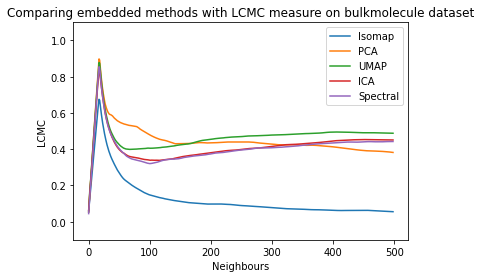

In [23]:
plt.plot(lcmc_isomap, label = 'Isomap')
plt.plot(lcmc_pca, label = 'PCA')
plt.plot(lcmc_UMAP, label = 'UMAP')
plt.plot(lcmc_ica, label = 'ICA')
plt.plot(lcmc_spec, label = 'Spectral')
plt.ylim(-0.1,1.1)
plt.legend()
plt.title('Comparing embedded methods with LCMC measure on bulkmolecule dataset')
plt.ylabel('LCMC')
plt.xlabel('Neighbours')

Text(0.5, 0, 'Neighbours')

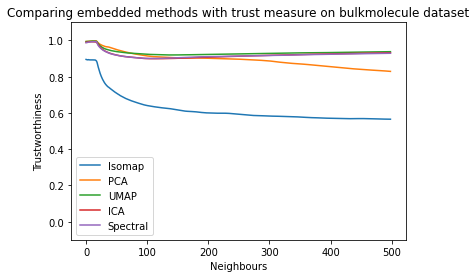

In [24]:
plt.plot(trust_isomap, label = 'Isomap')
plt.plot(trust_pca, label = 'PCA')
plt.plot(trust_UMAP, label = 'UMAP')
plt.plot(trust_ica, label = 'ICA')
plt.plot(trust_spec, label = 'Spectral')
plt.ylim(-0.1,1.1)
plt.legend()
plt.title('Comparing embedded methods with trust measure on bulkmolecule dataset')
plt.ylabel('Trustworthiness')
plt.xlabel('Neighbours')

Text(0.5, 0, 'Neighbours')

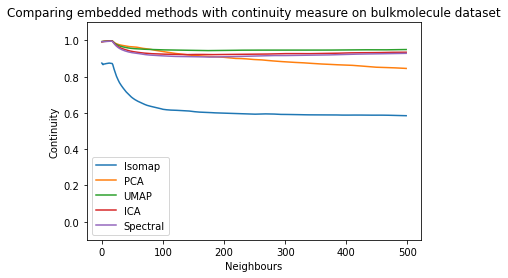

In [25]:
plt.plot(cont_isomap, label = 'Isomap')
plt.plot(cont_pca, label = 'PCA')
plt.plot(cont_UMAP, label = 'UMAP')
plt.plot(cont_ica, label = 'ICA')
plt.plot(cont_spec, label = 'Spectral')
plt.ylim(-0.1,1.1)
plt.legend()
plt.title('Comparing embedded methods with continuity measure on bulkmolecule dataset')
plt.ylabel('Continuity')
plt.xlabel('Neighbours')

In [26]:
AUC_T1 = np.mean(trust_isomap)
AUC_C1 = np.mean(cont_isomap)
AUC_T2 = np.mean(trust_pca)
AUC_C2 = np.mean(cont_pca)
AUC_T3 = np.mean(trust_UMAP)
AUC_C3 = np.mean(cont_UMAP)
AUC_T5 = np.mean(trust_ica)
AUC_C5 = np.mean(cont_ica)
AUC_T6 = np.mean(trust_spec)
AUC_C6 = np.mean(cont_spec)



print("AUC of isomap Trust = ", AUC_T1)
print("AUC of isomap Cont = ", AUC_C1)
print("AUC of PCA Trust = ", AUC_T2)
print("AUC of PCA Cont = ", AUC_C2)
print("AUC of UMAP Trust = ", AUC_T3)
print("AUC of UMAP Cont = ", AUC_C3)
print("AUC of ICA Trust = ", AUC_T5)
print("AUC of ICA Cont = ", AUC_C5)
print("AUC of Spectral Embedding Trust = ", AUC_T6)
print("AUC of Spectral Embedding Cont = ", AUC_C6)

AUC of isomap Trust =  0.6194251644374584
AUC of isomap Cont =  0.6204191975589716
AUC of PCA Trust =  0.8937727312418499
AUC of PCA Cont =  0.9019328457929019
AUC of UMAP Trust =  0.9329213365548369
AUC of UMAP Cont =  0.9505723787182612
AUC of ICA Trust =  0.9201483995582814
AUC of ICA Cont =  0.9319370763965942
AUC of Spectral Embedding Trust =  0.9199095398927255
AUC of Spectral Embedding Cont =  0.9231055747603215


In [70]:
m = len(Q1)
QNN1 = np.zeros(m)
for k in range(m):    
        QNN1[k] = np.sum(Q1[:k+1,:k+1])/((k+1) * m)
        
Plot_QNN1 = QNN1[range(1,2069)]

m = len(Q2)
QNN2 = np.zeros(m)
for k in range(m):    
        QNN2[k] = np.sum(Q2[:k+1,:k+1])/((k+1) * m)
       
Plot_QNN2 = QNN2[range(1,2069)]

m = len(Q3)
QNN3 = np.zeros(m)
for k in range(m):    
        QNN3[k] = np.sum(Q3[:k+1,:k+1])/((k+1) * m)
       
Plot_QNN3 = QNN3[range(1,2069)]

m = len(Q5)
QNN5 = np.zeros(m)
for k in range(m):    
        QNN5[k] = np.sum(Q5[:k+1,:k+1])/((k+1) * m)
       
Plot_QNN5 = QNN5[range(1,2069)]

m = len(Q6)
QNN6 = np.zeros(m)
for k in range(m):    
        QNN6[k] = np.sum(Q6[:k+1,:k+1])/((k+1) * m)
       
Plot_QNN6 = QNN6[range(1,2069)]

Text(0.5, 0, 'Neighbours')

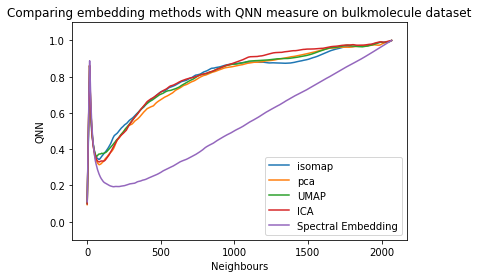

In [71]:
plt.plot(list(range(1, len(Plot_QNN1)+1)), Plot_QNN1, label = 'isomap')
plt.plot(list(range(1, len(Plot_QNN2)+1)), Plot_QNN2, label = 'pca')
plt.plot(list(range(1, len(Plot_QNN3)+1)), Plot_QNN3, label = 'UMAP')
plt.plot(list(range(1, len(Plot_QNN5)+1)), Plot_QNN5, label = 'ICA')
plt.plot(list(range(1, len(Plot_QNN6)+1)), Plot_QNN6, label = 'Spectral Embedding')
plt.ylim(-0.1,1.1)
plt.legend()
plt.title('Comparing embedding methods with QNN measure on bulkmolecule dataset')
plt.ylabel('QNN')
plt.xlabel('Neighbours')

In [29]:
AUC1 = np.mean(QNN1)
AUC2 = np.mean(QNN2)
AUC3 = np.mean(QNN3)
AUC5 = np.mean(QNN5)
AUC6 = np.mean(QNN6)

print("AUC of isomap is", AUC1)
print("AUC of pca is", AUC2)
print("AUC of UMAP is", AUC3)
print("AUC of ICA is", AUC5)
print("AUC of Spectral Embedding is", AUC6)

AUC of isomap is 0.5289746180679162
AUC of pca is 0.7075923672570869
AUC of UMAP is 0.8240246834382629
AUC of ICA is 0.8061496303817641
AUC of Spectral Embedding is 0.7975555676437935


In [30]:
kmax1 = np.argmax(lcmc_isomap)
kmax2 = np.argmax(lcmc_pca)
kmax3 = np.argmax(lcmc_UMAP)
kmax5 = np.argmax(lcmc_ica)
kmax6 = np.argmax(lcmc_spec)

print("kmax of isomap is", kmax1)
print("kmax of pca is", kmax2)
print("kmax of UMAP is", kmax3)
print("kmax of ICA is", kmax5)
print("kmax of Spectral Embedding is", kmax6)

kmax of isomap is 17
kmax of pca is 17
kmax of UMAP is 17
kmax of ICA is 17
kmax of Spectral Embedding is 17


In [31]:
Qlocal1 = np.sum(QNN1[:kmax1+1])/(kmax1 + 1) 
Qglobal1 = np.sum(QNN1[kmax1:-1])/(m - kmax1 -1)

Qlocal2 = np.sum(QNN2[:kmax2+1])/(kmax2 + 1) 
Qglobal2 = np.sum(QNN2[kmax2:-1])/(m - kmax2 -1)

Qlocal3 = np.sum(QNN3[:kmax3+1])/(kmax3 + 1) 
Qglobal3 = np.sum(QNN3[kmax3:-1])/(m - kmax3 -1)

Qlocal5 = np.sum(QNN5[:kmax5+1])/(kmax5 + 1) 
Qglobal5 = np.sum(QNN5[kmax5:-1])/(m - kmax5 -1)

Qlocal6 = np.sum(QNN6[:kmax6+1])/(kmax6 + 1) 
Qglobal6 = np.sum(QNN6[kmax6:-1])/(m - kmax6 -1)

print("Qlocal of isomap =", Qlocal1)
print("Qglobal of isomap =", Qglobal1)

print("Qlocal of pca =", Qlocal2)
print("Qglobal of pca =", Qglobal2)

print("Qlocal of UMAP =", Qlocal3)
print("Qglobal of UMAP =", Qglobal3)

print("Qlocal of ICA =", Qlocal5)
print("Qglobal of ICA =", Qglobal5)

print("Qlocal of Spectral Embedding =", Qlocal6)
print("Qglobal of Spectral Embedding =", Qglobal6)

Qlocal of isomap = 0.377922084374003
Qglobal of isomap = 0.530146192053435
Qlocal of pca = 0.48836553410806627
Qglobal of pca = 0.7094709289714871
Qlocal of UMAP = 0.48533191248276925
Qglobal of UMAP = 0.8269419368480803
Qlocal of ICA = 0.46482075506540294
Qglobal of ICA = 0.8090696467156806
Qlocal of Spectral Embedding = 0.46258023053848923
Qglobal of Spectral Embedding = 0.8004289373140598


### Quality metrics in 2D - UMAP

In [81]:
from sklearn.decomposition import PCA, FastICA
from sklearn import manifold
import matplotlib.ticker as mticker
import umap
from sklearn.manifold import SpectralEmbedding

import time

start = time.perf_counter()
# Generate UMAP embedding
mapper = umap.UMAP(n_neighbors=15,min_dist=0,n_components=2, metric='euclidean', random_state=0).fit(standardised_data) #default settings
UMAP_embedding1 = mapper.transform(standardised_data)

end = time.perf_counter()
print(f"Processed the UMAP algorithm in {start-end:0.4f} seconds")

start = time.perf_counter()
# Generate UMAP embedding
mapper = umap.UMAP(n_neighbors=15,min_dist=0.01,n_components=2, metric='euclidean', random_state=0).fit(standardised_data) #default settings
UMAP_embedding2 = mapper.transform(standardised_data)

end = time.perf_counter()
print(f"Processed the UMAP algorithm in {start-end:0.4f} seconds")

start = time.perf_counter()
# Generate UMAP embedding
mapper = umap.UMAP(n_neighbors=15,min_dist=0.05,n_components=2, metric='euclidean', random_state=0).fit(standardised_data) #default settings
UMAP_embedding3 = mapper.transform(standardised_data)

end = time.perf_counter()
print(f"Processed the UMAP algorithm in {start-end:0.4f} seconds")

start = time.perf_counter()
# Generate UMAP embedding
mapper = umap.UMAP(n_neighbors=15,min_dist=0.1,n_components=2, metric='euclidean', random_state=0).fit(standardised_data) #default settings
UMAP_embedding4 = mapper.transform(standardised_data)

end = time.perf_counter()
print(f"Processed the UMAP algorithm in {start-end:0.4f} seconds")

start = time.perf_counter()
# Generate UMAP embedding
mapper = umap.UMAP(n_neighbors=15,min_dist=0.5,n_components=2, metric='euclidean', random_state=0).fit(standardised_data) #default settings
UMAP_embedding5 = mapper.transform(standardised_data)

end = time.perf_counter()
print(f"Processed the UMAP algorithm in {start-end:0.4f} seconds")

start = time.perf_counter()
# Generate UMAP embedding
mapper = umap.UMAP(n_neighbors=15,min_dist=1,n_components=2, metric='euclidean', random_state=0).fit(standardised_data) #default settings
UMAP_embedding6 = mapper.transform(standardised_data)

end = time.perf_counter()
print(f"Processed the UMAP algorithm in {start-end:0.4f} seconds")

start = time.perf_counter()
# Generate UMAP embedding
mapper = umap.UMAP(n_neighbors=30,min_dist=0,n_components=2, metric='euclidean', random_state=0).fit(standardised_data) #default settings
UMAP_embedding7 = mapper.transform(standardised_data)

end = time.perf_counter()
print(f"Processed the UMAP algorithm in {start-end:0.4f} seconds")

start = time.perf_counter()
# Generate UMAP embedding
mapper = umap.UMAP(n_neighbors=30,min_dist=0.01,n_components=2, metric='euclidean', random_state=0).fit(standardised_data) #default settings
UMAP_embedding8 = mapper.transform(standardised_data)

end = time.perf_counter()
print(f"Processed the UMAP algorithm in {start-end:0.4f} seconds")

start = time.perf_counter()
# Generate UMAP embedding
mapper = umap.UMAP(n_neighbors=30,min_dist=0.05,n_components=2, metric='euclidean', random_state=0).fit(standardised_data) #default settings
UMAP_embedding9 = mapper.transform(standardised_data)

end = time.perf_counter()
print(f"Processed the UMAP algorithm in {start-end:0.4f} seconds")

start = time.perf_counter()
# Generate UMAP embedding
mapper = umap.UMAP(n_neighbors=30,min_dist=0.1,n_components=2, metric='euclidean', random_state=0).fit(standardised_data) #default settings
UMAP_embedding10 = mapper.transform(standardised_data)

end = time.perf_counter()
print(f"Processed the UMAP algorithm in {start-end:0.4f} seconds")

start = time.perf_counter()
# Generate UMAP embedding
mapper = umap.UMAP(n_neighbors=30,min_dist=0.5,n_components=2, metric='euclidean', random_state=0).fit(standardised_data) #default settings
UMAP_embedding11 = mapper.transform(standardised_data)

end = time.perf_counter()
print(f"Processed the UMAP algorithm in {start-end:0.4f} seconds")

start = time.perf_counter()
# Generate UMAP embedding
mapper = umap.UMAP(n_neighbors=30,min_dist=1,n_components=2, metric='euclidean', random_state=0).fit(standardised_data) #default settings
UMAP_embedding12 = mapper.transform(standardised_data)

end = time.perf_counter()
print(f"Processed the UMAP algorithm in {start-end:0.4f} seconds")

start = time.perf_counter()
# Generate UMAP embedding
mapper = umap.UMAP(n_neighbors=50,min_dist=0,n_components=2, metric='euclidean', random_state=0).fit(standardised_data) #default settings
UMAP_embedding13 = mapper.transform(standardised_data)

end = time.perf_counter()
print(f"Processed the UMAP algorithm in {start-end:0.4f} seconds")

start = time.perf_counter()
# Generate UMAP embedding
mapper = umap.UMAP(n_neighbors=50,min_dist=0.01,n_components=2, metric='euclidean', random_state=0).fit(standardised_data) #default settings
UMAP_embedding14 = mapper.transform(standardised_data)

end = time.perf_counter()
print(f"Processed the UMAP algorithm in {start-end:0.4f} seconds")

start = time.perf_counter()
# Generate UMAP embedding
mapper = umap.UMAP(n_neighbors=50,min_dist=0.05,n_components=2, metric='euclidean', random_state=0).fit(standardised_data) #default settings
UMAP_embedding15 = mapper.transform(standardised_data)

end = time.perf_counter()
print(f"Processed the UMAP algorithm in {start-end:0.4f} seconds")

start = time.perf_counter()
# Generate UMAP embedding
mapper = umap.UMAP(n_neighbors=50,min_dist=0.1,n_components=2, metric='euclidean', random_state=0).fit(standardised_data) #default settings
UMAP_embedding16 = mapper.transform(standardised_data)

end = time.perf_counter()
print(f"Processed the UMAP algorithm in {start-end:0.4f} seconds")

start = time.perf_counter()
# Generate UMAP embedding
mapper = umap.UMAP(n_neighbors=50,min_dist=0.5,n_components=2, metric='euclidean', random_state=0).fit(standardised_data) #default settings
UMAP_embedding17 = mapper.transform(standardised_data)

end = time.perf_counter()
print(f"Processed the UMAP algorithm in {start-end:0.4f} seconds")

start = time.perf_counter()
# Generate UMAP embedding
mapper = umap.UMAP(n_neighbors=50,min_dist=1,n_components=2, metric='euclidean', random_state=0).fit(standardised_data) #default settings
UMAP_embedding18 = mapper.transform(standardised_data)

end = time.perf_counter()
print(f"Processed the UMAP algorithm in {start-end:0.4f} seconds")

start = time.perf_counter()
# Generate UMAP embedding
mapper = umap.UMAP(n_neighbors=100,min_dist=0,n_components=2, metric='euclidean', random_state=0).fit(standardised_data) #default settings
UMAP_embedding19 = mapper.transform(standardised_data)

end = time.perf_counter()
print(f"Processed the UMAP algorithm in {start-end:0.4f} seconds")

start = time.perf_counter()
# Generate UMAP embedding
mapper = umap.UMAP(n_neighbors=100,min_dist=0.01,n_components=2, metric='euclidean', random_state=0).fit(standardised_data) #default settings
UMAP_embedding20 = mapper.transform(standardised_data)

end = time.perf_counter()
print(f"Processed the UMAP algorithm in {start-end:0.4f} seconds")

start = time.perf_counter()
# Generate UMAP embedding
mapper = umap.UMAP(n_neighbors=100,min_dist=0.05,n_components=2, metric='euclidean', random_state=0).fit(standardised_data) #default settings
UMAP_embedding21 = mapper.transform(standardised_data)

end = time.perf_counter()
print(f"Processed the UMAP algorithm in {start-end:0.4f} seconds")

start = time.perf_counter()
# Generate UMAP embedding
mapper = umap.UMAP(n_neighbors=100,min_dist=0.1,n_components=2, metric='euclidean', random_state=0).fit(standardised_data) #default settings
UMAP_embedding22 = mapper.transform(standardised_data)

end = time.perf_counter()
print(f"Processed the UMAP algorithm in {start-end:0.4f} seconds")

start = time.perf_counter()
# Generate UMAP embedding
mapper = umap.UMAP(n_neighbors=100,min_dist=0.5,n_components=2, metric='euclidean', random_state=0).fit(standardised_data) #default settings
UMAP_embedding23 = mapper.transform(standardised_data)

end = time.perf_counter()
print(f"Processed the UMAP algorithm in {start-end:0.4f} seconds")

start = time.perf_counter()
# Generate UMAP embedding
mapper = umap.UMAP(n_neighbors=100,min_dist=1,n_components=2, metric='euclidean', random_state=0).fit(standardised_data) #default settings
UMAP_embedding24 = mapper.transform(standardised_data)

end = time.perf_counter()
print(f"Processed the UMAP algorithm in {start-end:0.4f} seconds")


/home/bonsai/.pyenv/versions/3.8.5/envs/wcEcoli3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Processed the UMAP algorithm in -23.3725 seconds


/home/bonsai/.pyenv/versions/3.8.5/envs/wcEcoli3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Processed the UMAP algorithm in -24.4764 seconds


/home/bonsai/.pyenv/versions/3.8.5/envs/wcEcoli3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Processed the UMAP algorithm in -23.2287 seconds


/home/bonsai/.pyenv/versions/3.8.5/envs/wcEcoli3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Processed the UMAP algorithm in -23.9153 seconds


/home/bonsai/.pyenv/versions/3.8.5/envs/wcEcoli3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Processed the UMAP algorithm in -24.4828 seconds


/home/bonsai/.pyenv/versions/3.8.5/envs/wcEcoli3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Processed the UMAP algorithm in -24.0717 seconds
Processed the UMAP algorithm in -31.2813 seconds
Processed the UMAP algorithm in -32.5137 seconds
Processed the UMAP algorithm in -32.3769 seconds
Processed the UMAP algorithm in -31.7540 seconds
Processed the UMAP algorithm in -31.6659 seconds
Processed the UMAP algorithm in -31.4083 seconds
Processed the UMAP algorithm in -37.2390 seconds
Processed the UMAP algorithm in -35.9871 seconds
Processed the UMAP algorithm in -35.4392 seconds
Processed the UMAP algorithm in -37.1926 seconds
Processed the UMAP algorithm in -37.3474 seconds
Processed the UMAP algorithm in -35.7065 seconds
Processed the UMAP algorithm in -37.1131 seconds
Processed the UMAP algorithm in -38.8473 seconds
Processed the UMAP algorithm in -37.8324 seconds
Processed the UMAP algorithm in -36.3097 seconds
Processed the UMAP algorithm in -36.1388 seconds
Processed the UMAP algorithm in -36.5334 seconds


In [33]:
import coranking
from coranking.metrics import trustworthiness, continuity, LCMC

Q1 = coranking.coranking_matrix(standardised_data, UMAP_embedding1)
trust_isomap = trustworthiness(Q1, min_k=1, max_k=500)
cont_isomap = continuity(Q1, min_k=1, max_k=500)
lcmc_isomap = LCMC(Q1, min_k=1, max_k=500)

Q2 = coranking.coranking_matrix(standardised_data, UMAP_embedding2)
trust_pca = trustworthiness(Q2, min_k=1, max_k=500)
cont_pca = continuity(Q2, min_k=1, max_k=500)
lcmc_pca = LCMC(Q2, min_k=1, max_k=500)

Q3 = coranking.coranking_matrix(standardised_data, UMAP_embedding3)
trust_UMAP = trustworthiness(Q3, min_k=1, max_k=500)
cont_UMAP = continuity(Q3, min_k=1, max_k=500)
lcmc_UMAP = LCMC(Q3, min_k=1, max_k=500)

Q4 = coranking.coranking_matrix(standardised_data, UMAP_embedding4)
trust_ica = trustworthiness(Q4, min_k=1, max_k=500)
cont_ica = continuity(Q4, min_k=1, max_k=500)
lcmc_ica = LCMC(Q4, min_k=1, max_k=500)

Q5 = coranking.coranking_matrix(standardised_data, UMAP_embedding5)
trust_spec = trustworthiness(Q5, min_k=1, max_k=500)
cont_spec = continuity(Q5, min_k=1, max_k=500)
lcmc_spec = LCMC(Q5, min_k=1, max_k=500)


Q6 = coranking.coranking_matrix(standardised_data, UMAP_embedding6)
trust_isomap2 = trustworthiness(Q6, min_k=1, max_k=500)
cont_isomap2 = continuity(Q6, min_k=1, max_k=500)
lcmc_isomap2 = LCMC(Q6, min_k=1, max_k=500)

Q7 = coranking.coranking_matrix(standardised_data, UMAP_embedding7)
trust_pca2 = trustworthiness(Q7, min_k=1, max_k=500)
cont_pca2 = continuity(Q7, min_k=1, max_k=500)
lcmc_pca2 = LCMC(Q7, min_k=1, max_k=500)

Q8 = coranking.coranking_matrix(standardised_data, UMAP_embedding8)
trust_UMAP2 = trustworthiness(Q8, min_k=1, max_k=500)
cont_UMAP2 = continuity(Q8, min_k=1, max_k=500)
lcmc_UMAP2 = LCMC(Q8, min_k=1, max_k=500)

Q9 = coranking.coranking_matrix(standardised_data, UMAP_embedding9)
trust_ica2 = trustworthiness(Q9, min_k=1, max_k=500)
cont_ica2 = continuity(Q9, min_k=1, max_k=500)
lcmc_ica2 = LCMC(Q9, min_k=1, max_k=500)

Q10 = coranking.coranking_matrix(standardised_data, UMAP_embedding10)
trust_spec2 = trustworthiness(Q10, min_k=1, max_k=500)
cont_spec2 = continuity(Q10, min_k=1, max_k=500)
lcmc_spec2 = LCMC(Q10, min_k=1, max_k=500)


Q11 = coranking.coranking_matrix(standardised_data, UMAP_embedding11)
trust_isomap3 = trustworthiness(Q11, min_k=1, max_k=500)
cont_isomap3 = continuity(Q11, min_k=1, max_k=500)
lcmc_isomap3 = LCMC(Q11, min_k=1, max_k=500)

Q12 = coranking.coranking_matrix(standardised_data, UMAP_embedding12)
trust_pca3 = trustworthiness(Q12, min_k=1, max_k=500)
cont_pca3 = continuity(Q12, min_k=1, max_k=500)
lcmc_pca3 = LCMC(Q12, min_k=1, max_k=500)

Q13 = coranking.coranking_matrix(standardised_data, UMAP_embedding13)
trust_UMAP3 = trustworthiness(Q13, min_k=1, max_k=500)
cont_UMAP3 = continuity(Q13, min_k=1, max_k=500)
lcmc_UMAP3 = LCMC(Q13, min_k=1, max_k=500)

Q14 = coranking.coranking_matrix(standardised_data, UMAP_embedding14)
trust_ica3 = trustworthiness(Q14, min_k=1, max_k=500)
cont_ica3 = continuity(Q14, min_k=1, max_k=500)
lcmc_ica3 = LCMC(Q14, min_k=1, max_k=500)

Q15 = coranking.coranking_matrix(standardised_data, UMAP_embedding15)
trust_spec3 = trustworthiness(Q15, min_k=1, max_k=500)
cont_spec3 = continuity(Q15, min_k=1, max_k=500)
lcmc_spec3 = LCMC(Q15, min_k=1, max_k=500)


Q16 = coranking.coranking_matrix(standardised_data, UMAP_embedding16)
trust_isomap4 = trustworthiness(Q16, min_k=1, max_k=500)
cont_isomap4 = continuity(Q16, min_k=1, max_k=500)
lcmc_isomap4 = LCMC(Q16, min_k=1, max_k=500)

Q17 = coranking.coranking_matrix(standardised_data, UMAP_embedding17)
trust_pca4 = trustworthiness(Q17, min_k=1, max_k=500)
cont_pca4 = continuity(Q17, min_k=1, max_k=500)
lcmc_pca4 = LCMC(Q17, min_k=1, max_k=500)

Q18 = coranking.coranking_matrix(standardised_data, UMAP_embedding18)
trust_UMAP4 = trustworthiness(Q18, min_k=1, max_k=500)
cont_UMAP4 = continuity(Q18, min_k=1, max_k=500)
lcmc_UMAP4 = LCMC(Q18, min_k=1, max_k=500)

Q19 = coranking.coranking_matrix(standardised_data, UMAP_embedding19)
trust_ica4 = trustworthiness(Q19, min_k=1, max_k=500)
cont_ica4 = continuity(Q19, min_k=1, max_k=500)
lcmc_ica4 = LCMC(Q19, min_k=1, max_k=500)

Q20 = coranking.coranking_matrix(standardised_data, UMAP_embedding20)
trust_spec4 = trustworthiness(Q20, min_k=1, max_k=500)
cont_spec4 = continuity(Q20, min_k=1, max_k=500)
lcmc_spec4 = LCMC(Q20, min_k=1, max_k=500)


Q21 = coranking.coranking_matrix(standardised_data, UMAP_embedding21)
trust_isomap5 = trustworthiness(Q21, min_k=1, max_k=500)
cont_isomap5 = continuity(Q21, min_k=1, max_k=500)
lcmc_isomap5 = LCMC(Q21, min_k=1, max_k=500)

Q22 = coranking.coranking_matrix(standardised_data, UMAP_embedding22)
trust_pca5 = trustworthiness(Q22, min_k=1, max_k=500)
cont_pca5 = continuity(Q22, min_k=1, max_k=500)
lcmc_pca5 = LCMC(Q22, min_k=1, max_k=500)

Q23 = coranking.coranking_matrix(standardised_data, UMAP_embedding23)
trust_UMAP5 = trustworthiness(Q23, min_k=1, max_k=500)
cont_UMAP5 = continuity(Q23, min_k=1, max_k=500)
lcmc_UMAP5 = LCMC(Q23, min_k=1, max_k=500)

Q24 = coranking.coranking_matrix(standardised_data, UMAP_embedding24)
trust_ica5 = trustworthiness(Q24, min_k=1, max_k=500)
cont_ica5 = continuity(Q24, min_k=1, max_k=500)
lcmc_ica5 = LCMC(Q24, min_k=1, max_k=500)

In [34]:
AUC_T1 = np.mean(trust_isomap)
AUC_C1 = np.mean(cont_isomap)
AUC_T2 = np.mean(trust_pca)
AUC_C2 = np.mean(cont_pca)
AUC_T3 = np.mean(trust_UMAP)
AUC_C3 = np.mean(cont_UMAP)
AUC_T4 = np.mean(trust_ica)
AUC_C4 = np.mean(cont_ica)
AUC_T5 = np.mean(trust_spec)
AUC_C5 = np.mean(cont_spec)



print("AUC of isomap Trust = ", AUC_T1)
print("AUC of isomap Cont = ", AUC_C1)
print("AUC of PCA Trust = ", AUC_T2)
print("AUC of PCA Cont = ", AUC_C2)
print("AUC of UMAP Trust = ", AUC_T3)
print("AUC of UMAP Cont = ", AUC_C3)
print("AUC of ICA Trust = ", AUC_T4)
print("AUC of ICA Cont = ", AUC_C4)
print("AUC of Spectral Embedding Trust = ", AUC_T5)
print("AUC of Spectral Embedding Cont = ", AUC_C5)

AUC_T6 = np.mean(trust_isomap2)
AUC_C6 = np.mean(cont_isomap2)
AUC_T7 = np.mean(trust_pca2)
AUC_C7 = np.mean(cont_pca2)
AUC_T8 = np.mean(trust_UMAP2)
AUC_C8 = np.mean(cont_UMAP2)
AUC_T9 = np.mean(trust_ica2)
AUC_C9 = np.mean(cont_ica2)
AUC_T10 = np.mean(trust_spec2)
AUC_C10 = np.mean(cont_spec2)



print("AUC of isomap Trust = ", AUC_T6)
print("AUC of isomap Cont = ", AUC_C6)
print("AUC of PCA Trust = ", AUC_T7)
print("AUC of PCA Cont = ", AUC_C7)
print("AUC of UMAP Trust = ", AUC_T8)
print("AUC of UMAP Cont = ", AUC_C8)
print("AUC of ICA Trust = ", AUC_T9)
print("AUC of ICA Cont = ", AUC_C9)
print("AUC of Spectral Embedding Trust = ", AUC_T10)
print("AUC of Spectral Embedding Cont = ", AUC_C10)

AUC_T11 = np.mean(trust_isomap3)
AUC_C11 = np.mean(cont_isomap3)
AUC_T12 = np.mean(trust_pca3)
AUC_C12 = np.mean(cont_pca3)
AUC_T13 = np.mean(trust_UMAP3)
AUC_C13 = np.mean(cont_UMAP3)
AUC_T14 = np.mean(trust_ica3)
AUC_C14 = np.mean(cont_ica3)
AUC_T15 = np.mean(trust_spec3)
AUC_C15 = np.mean(cont_spec3)



print("AUC of isomap Trust = ", AUC_T11)
print("AUC of isomap Cont = ", AUC_C11)
print("AUC of PCA Trust = ", AUC_T12)
print("AUC of PCA Cont = ", AUC_C12)
print("AUC of UMAP Trust = ", AUC_T13)
print("AUC of UMAP Cont = ", AUC_C13)
print("AUC of ICA Trust = ", AUC_T14)
print("AUC of ICA Cont = ", AUC_C14)
print("AUC of Spectral Embedding Trust = ", AUC_T15)
print("AUC of Spectral Embedding Cont = ", AUC_C15)

AUC_T16 = np.mean(trust_isomap4)
AUC_C16 = np.mean(cont_isomap4)
AUC_T17 = np.mean(trust_pca4)
AUC_C17 = np.mean(cont_pca4)
AUC_T18 = np.mean(trust_UMAP4)
AUC_C18 = np.mean(cont_UMAP4)
AUC_T19 = np.mean(trust_ica4)
AUC_C19 = np.mean(cont_ica4)
AUC_T20 = np.mean(trust_spec4)
AUC_C20 = np.mean(cont_spec4)



print("AUC of isomap Trust = ", AUC_T16)
print("AUC of isomap Cont = ", AUC_C16)
print("AUC of PCA Trust = ", AUC_T17)
print("AUC of PCA Cont = ", AUC_C17)
print("AUC of UMAP Trust = ", AUC_T18)
print("AUC of UMAP Cont = ", AUC_C18)
print("AUC of ICA Trust = ", AUC_T19)
print("AUC of ICA Cont = ", AUC_C19)
print("AUC of Spectral Embedding Trust = ", AUC_T20)
print("AUC of Spectral Embedding Cont = ", AUC_C20)

AUC_T21 = np.mean(trust_isomap5)
AUC_C21 = np.mean(cont_isomap5)
AUC_T22 = np.mean(trust_pca5)
AUC_C22 = np.mean(cont_pca5)
AUC_T23 = np.mean(trust_UMAP5)
AUC_C23 = np.mean(cont_UMAP5)
AUC_T24 = np.mean(trust_ica5)
AUC_C24 = np.mean(cont_ica5)



print("AUC of isomap Trust = ", AUC_T21)
print("AUC of isomap Cont = ", AUC_C21)
print("AUC of PCA Trust = ", AUC_T22)
print("AUC of PCA Cont = ", AUC_C22)
print("AUC of UMAP Trust = ", AUC_T23)
print("AUC of UMAP Cont = ", AUC_C23)
print("AUC of ICA Trust = ", AUC_T24)
print("AUC of ICA Cont = ", AUC_C24)

AUC of isomap Trust =  0.6094976954054636
AUC of isomap Cont =  0.6355432930377399
AUC of PCA Trust =  0.6257150364141257
AUC of PCA Cont =  0.6504562676381747
AUC of UMAP Trust =  0.609121015005989
AUC of UMAP Cont =  0.6565799673428739
AUC of ICA Trust =  0.6173582706437832
AUC of ICA Cont =  0.6564889694802424
AUC of Spectral Embedding Trust =  0.6376635393184792
AUC of Spectral Embedding Cont =  0.6462138140834919
AUC of isomap Trust =  0.6157778469632029
AUC of isomap Cont =  0.6203484930638608
AUC of PCA Trust =  0.8754636788824512
AUC of PCA Cont =  0.8687964014673802
AUC of UMAP Trust =  0.8588401875047385
AUC of UMAP Cont =  0.8335613343235163
AUC of ICA Trust =  0.8516466803805376
AUC of ICA Cont =  0.8579767871441791
AUC of Spectral Embedding Trust =  0.8631755291117196
AUC of Spectral Embedding Cont =  0.850250562822247
AUC of isomap Trust =  0.8462033131266722
AUC of isomap Cont =  0.8256000401694568
AUC of PCA Trust =  0.8199152024748596
AUC of PCA Cont =  0.8155640135660

In [35]:
m = len(Q1)
QNN1 = np.zeros(m)
for k in range(m):    
        QNN1[k] = np.sum(Q1[:k+1,:k+1])/((k+1) * m)
        

m = len(Q2)
QNN2 = np.zeros(m)
for k in range(m):    
        QNN2[k] = np.sum(Q2[:k+1,:k+1])/((k+1) * m)
       

m = len(Q3)
QNN3 = np.zeros(m)
for k in range(m):    
        QNN3[k] = np.sum(Q3[:k+1,:k+1])/((k+1) * m)
    

m = len(Q4)
QNN4 = np.zeros(m)
for k in range(m):    
        QNN4[k] = np.sum(Q4[:k+1,:k+1])/((k+1) * m)
       

m = len(Q5)
QNN5 = np.zeros(m)
for k in range(m):    
        QNN5[k] = np.sum(Q5[:k+1,:k+1])/((k+1) * m)
        
        
        
m = len(Q6)
QNN6 = np.zeros(m)
for k in range(m):    
        QNN6[k] = np.sum(Q6[:k+1,:k+1])/((k+1) * m)
        

m = len(Q7)
QNN7 = np.zeros(m)
for k in range(m):    
        QNN7[k] = np.sum(Q7[:k+1,:k+1])/((k+1) * m)
       

m = len(Q8)
QNN8 = np.zeros(m)
for k in range(m):    
        QNN8[k] = np.sum(Q8[:k+1,:k+1])/((k+1) * m)
    

m = len(Q9)
QNN9 = np.zeros(m)
for k in range(m):    
        QNN9[k] = np.sum(Q9[:k+1,:k+1])/((k+1) * m)
       

m = len(Q10)
QNN10 = np.zeros(m)
for k in range(m):    
        QNN10[k] = np.sum(Q10[:k+1,:k+1])/((k+1) * m)
        
        
m = len(Q11)
QNN11 = np.zeros(m)
for k in range(m):    
        QNN11[k] = np.sum(Q11[:k+1,:k+1])/((k+1) * m)
        

m = len(Q12)
QNN12 = np.zeros(m)
for k in range(m):    
        QNN12[k] = np.sum(Q12[:k+1,:k+1])/((k+1) * m)
       

m = len(Q13)
QNN13 = np.zeros(m)
for k in range(m):    
        QNN13[k] = np.sum(Q13[:k+1,:k+1])/((k+1) * m)
    

m = len(Q14)
QNN14 = np.zeros(m)
for k in range(m):    
        QNN14[k] = np.sum(Q14[:k+1,:k+1])/((k+1) * m)
       

m = len(Q15)
QNN15 = np.zeros(m)
for k in range(m):    
        QNN15[k] = np.sum(Q15[:k+1,:k+1])/((k+1) * m)
        
        
m = len(Q16)
QNN16 = np.zeros(m)
for k in range(m):    
        QNN16[k] = np.sum(Q16[:k+1,:k+1])/((k+1) * m)
        

m = len(Q17)
QNN17 = np.zeros(m)
for k in range(m):    
        QNN17[k] = np.sum(Q17[:k+1,:k+1])/((k+1) * m)
       

m = len(Q18)
QNN18 = np.zeros(m)
for k in range(m):    
        QNN18[k] = np.sum(Q18[:k+1,:k+1])/((k+1) * m)
    

m = len(Q19)
QNN19 = np.zeros(m)
for k in range(m):    
        QNN19[k] = np.sum(Q19[:k+1,:k+1])/((k+1) * m)
       

m = len(Q20)
QNN20 = np.zeros(m)
for k in range(m):    
        QNN20[k] = np.sum(Q20[:k+1,:k+1])/((k+1) * m)
        
        
m = len(Q21)
QNN21 = np.zeros(m)
for k in range(m):    
        QNN21[k] = np.sum(Q21[:k+1,:k+1])/((k+1) * m)
        

m = len(Q22)
QNN22 = np.zeros(m)
for k in range(m):    
        QNN22[k] = np.sum(Q22[:k+1,:k+1])/((k+1) * m)
       

m = len(Q23)
QNN23 = np.zeros(m)
for k in range(m):    
        QNN23[k] = np.sum(Q23[:k+1,:k+1])/((k+1) * m)
    

m = len(Q24)
QNN24 = np.zeros(m)
for k in range(m):    
        QNN24[k] = np.sum(Q24[:k+1,:k+1])/((k+1) * m)

In [36]:
AUC1 = np.mean(QNN1)
AUC2 = np.mean(QNN2)
AUC3 = np.mean(QNN3)
AUC4 = np.mean(QNN4)
AUC5 = np.mean(QNN5)

print("AUC of isomap is", AUC1)
print("AUC of pca is", AUC2)
print("AUC of UMAP is", AUC3)
print("AUC of ICA is", AUC4)
print("AUC of Spectral Embedding is", AUC5)


AUC6 = np.mean(QNN6)
AUC7 = np.mean(QNN7)
AUC8 = np.mean(QNN8)
AUC9 = np.mean(QNN9)
AUC10 = np.mean(QNN10)

print("AUC of isomap is", AUC6)
print("AUC of pca is", AUC7)
print("AUC of UMAP is", AUC8)
print("AUC of ICA is", AUC9)
print("AUC of Spectral Embedding is", AUC10)


AUC11 = np.mean(QNN11)
AUC12 = np.mean(QNN12)
AUC13 = np.mean(QNN13)
AUC14 = np.mean(QNN14)
AUC15 = np.mean(QNN15)

print("AUC of isomap is", AUC11)
print("AUC of pca is", AUC12)
print("AUC of UMAP is", AUC13)
print("AUC of ICA is", AUC14)
print("AUC of Spectral Embedding is", AUC15)

AUC16 = np.mean(QNN16)
AUC17 = np.mean(QNN17)
AUC18 = np.mean(QNN18)
AUC19 = np.mean(QNN19)
AUC20 = np.mean(QNN20)

print("AUC of isomap is", AUC16)
print("AUC of pca is", AUC17)
print("AUC of UMAP is", AUC18)
print("AUC of ICA is", AUC19)
print("AUC of Spectral Embedding is", AUC20)

AUC21 = np.mean(QNN21)
AUC22 = np.mean(QNN22)
AUC23 = np.mean(QNN23)
AUC24 = np.mean(QNN24)

print("AUC of isomap is", AUC21)
print("AUC of pca is", AUC22)
print("AUC of UMAP is", AUC23)
print("AUC of ICA is", AUC24)

AUC of isomap is 0.5413749257108542
AUC of pca is 0.5456180171012155
AUC of UMAP is 0.5442448060475812
AUC of ICA is 0.5518279217763671
AUC of Spectral Embedding is 0.5528658897740982
AUC of isomap is 0.5417806174506479
AUC of pca is 0.7080182770265054
AUC of UMAP is 0.6933146476662487
AUC of ICA is 0.6966659894090296
AUC of Spectral Embedding is 0.7006289956501675
AUC of isomap is 0.6842248183728445
AUC of pca is 0.6593719283169216
AUC of UMAP is 0.7069628762426026
AUC of ICA is 0.6765340277009356
AUC of Spectral Embedding is 0.7165562906167995
AUC of isomap is 0.6460791656836757
AUC of pca is 0.7114006651599399
AUC of UMAP is 0.7180707678345651
AUC of ICA is 0.5920211704050582
AUC of Spectral Embedding is 0.6756957731050427
AUC of isomap is 0.6132460836567273
AUC of pca is 0.6276812750116282
AUC of UMAP is 0.7071977213508799
AUC of ICA is 0.6910048481994078


In [37]:
kmax1 = np.argmax(lcmc_isomap)
kmax2 = np.argmax(lcmc_pca)
kmax3 = np.argmax(lcmc_UMAP)
kmax4 = np.argmax(lcmc_ica)
kmax5 = np.argmax(lcmc_spec)

print("kmax of isomap is", kmax1)
print("kmax of pca is", kmax2)
print("kmax of UMAP is", kmax3)
print("kmax of ICA is", kmax4)
print("kmax of Spectral Embedding is", kmax5)


kmax6 = np.argmax(lcmc_isomap2)
kmax7 = np.argmax(lcmc_pca2)
kmax8 = np.argmax(lcmc_UMAP2)
kmax9 = np.argmax(lcmc_ica2)
kmax10 = np.argmax(lcmc_spec2)

print("kmax of isomap is", kmax6)
print("kmax of pca is", kmax7)
print("kmax of UMAP is", kmax8)
print("kmax of ICA is", kmax9)
print("kmax of Spectral Embedding is", kmax10)


kmax11 = np.argmax(lcmc_isomap3)
kmax12 = np.argmax(lcmc_pca3)
kmax13 = np.argmax(lcmc_UMAP3)
kmax14 = np.argmax(lcmc_ica3)
kmax15 = np.argmax(lcmc_spec3)

print("kmax of isomap is", kmax11)
print("kmax of pca is", kmax12)
print("kmax of UMAP is", kmax13)
print("kmax of ICA is", kmax14)
print("kmax of Spectral Embedding is", kmax15)


kmax16 = np.argmax(lcmc_isomap4)
kmax17 = np.argmax(lcmc_pca4)
kmax18 = np.argmax(lcmc_UMAP4)
kmax19 = np.argmax(lcmc_ica4)
kmax20 = np.argmax(lcmc_spec4)

print("kmax of isomap is", kmax16)
print("kmax of pca is", kmax17)
print("kmax of UMAP is", kmax18)
print("kmax of ICA is", kmax19)
print("kmax of Spectral Embedding is", kmax20)


kmax21 = np.argmax(lcmc_isomap5)
kmax22 = np.argmax(lcmc_pca5)
kmax23 = np.argmax(lcmc_UMAP5)
kmax24 = np.argmax(lcmc_ica5)


print("kmax of isomap is", kmax21)
print("kmax of pca is", kmax22)
print("kmax of UMAP is", kmax23)
print("kmax of ICA is", kmax24)

kmax of isomap is 18
kmax of pca is 18
kmax of UMAP is 18
kmax of ICA is 18
kmax of Spectral Embedding is 18
kmax of isomap is 18
kmax of pca is 18
kmax of UMAP is 18
kmax of ICA is 18
kmax of Spectral Embedding is 18
kmax of isomap is 18
kmax of pca is 18
kmax of UMAP is 18
kmax of ICA is 18
kmax of Spectral Embedding is 18
kmax of isomap is 18
kmax of pca is 18
kmax of UMAP is 18
kmax of ICA is 18
kmax of Spectral Embedding is 18
kmax of isomap is 18
kmax of pca is 18
kmax of UMAP is 18
kmax of ICA is 18


In [38]:
Qlocal1 = np.sum(QNN1[:kmax1+1])/(kmax1 + 1) 
Qglobal1 = np.sum(QNN1[kmax1:-1])/(m - kmax1 -1)

Qlocal2 = np.sum(QNN2[:kmax2+1])/(kmax2 + 1) 
Qglobal2 = np.sum(QNN2[kmax2:-1])/(m - kmax2 -1)

Qlocal3 = np.sum(QNN3[:kmax3+1])/(kmax3 + 1) 
Qglobal3 = np.sum(QNN3[kmax3:-1])/(m - kmax3 -1)

Qlocal4 = np.sum(QNN4[:kmax4+1])/(kmax4 + 1) 
Qglobal4 = np.sum(QNN4[kmax4:-1])/(m - kmax4 -1)

Qlocal5 = np.sum(QNN5[:kmax5+1])/(kmax5 + 1) 
Qglobal5 = np.sum(QNN5[kmax5:-1])/(m - kmax5 -1)

print("Qlocal of isomap =", Qlocal1)
print("Qglobal of isomap =", Qglobal1)

print("Qlocal of pca =", Qlocal2)
print("Qglobal of pca =", Qglobal2)

print("Qlocal of UMAP =", Qlocal3)
print("Qglobal of UMAP =", Qglobal3)

print("Qlocal of ICA =", Qlocal4)
print("Qglobal of ICA =", Qglobal4)

print("Qlocal of Spectral Embedding =", Qlocal5)
print("Qglobal of Spectral Embedding =", Qglobal5)



Qlocal6 = np.sum(QNN6[:kmax6+1])/(kmax6 + 1) 
Qglobal6 = np.sum(QNN6[kmax6:-1])/(m - kmax6 -1)

Qlocal7 = np.sum(QNN7[:kmax7+1])/(kmax7 + 1) 
Qglobal7 = np.sum(QNN7[kmax7:-1])/(m - kmax7 -1)

Qlocal8 = np.sum(QNN8[:kmax8+1])/(kmax8 + 1) 
Qglobal8 = np.sum(QNN8[kmax8:-1])/(m - kmax8 -1)

Qlocal9 = np.sum(QNN9[:kmax9+1])/(kmax9 + 1) 
Qglobal9 = np.sum(QNN9[kmax9:-1])/(m - kmax9 -1)

Qlocal10 = np.sum(QNN10[:kmax10+1])/(kmax10 + 1) 
Qglobal10 = np.sum(QNN10[kmax10:-1])/(m - kmax10 -1)

print("Qlocal of isomap =", Qlocal6)
print("Qglobal of isomap =", Qglobal6)

print("Qlocal of pca =", Qlocal7)
print("Qglobal of pca =", Qglobal7)

print("Qlocal of UMAP =", Qlocal8)
print("Qglobal of UMAP =", Qglobal8)

print("Qlocal of ICA =", Qlocal9)
print("Qglobal of ICA =", Qglobal9)

print("Qlocal of Spectral Embedding =", Qlocal10)
print("Qglobal of Spectral Embedding =", Qglobal10)


Qlocal11 = np.sum(QNN11[:kmax11+1])/(kmax11 + 1) 
Qglobal11 = np.sum(QNN11[kmax11:-1])/(m - kmax11 -1)

Qlocal12 = np.sum(QNN12[:kmax12+1])/(kmax12 + 1) 
Qglobal12 = np.sum(QNN12[kmax12:-1])/(m - kmax12 -1)

Qlocal13 = np.sum(QNN13[:kmax13+1])/(kmax13 + 1) 
Qglobal13 = np.sum(QNN13[kmax13:-1])/(m - kmax13 -1)

Qlocal14 = np.sum(QNN14[:kmax14+1])/(kmax14 + 1) 
Qglobal14 = np.sum(QNN14[kmax14:-1])/(m - kmax14 -1)

Qlocal15 = np.sum(QNN15[:kmax15+1])/(kmax15 + 1) 
Qglobal15 = np.sum(QNN15[kmax15:-1])/(m - kmax15 -1)

print("Qlocal of isomap =", Qlocal11)
print("Qglobal of isomap =", Qglobal11)

print("Qlocal of pca =", Qlocal12)
print("Qglobal of pca =", Qglobal12)

print("Qlocal of UMAP =", Qlocal13)
print("Qglobal of UMAP =", Qglobal13)

print("Qlocal of ICA =", Qlocal14)
print("Qglobal of ICA =", Qglobal14)

print("Qlocal of Spectral Embedding =", Qlocal15)
print("Qglobal of Spectral Embedding =", Qglobal15)


Qlocal16 = np.sum(QNN16[:kmax16+1])/(kmax16 + 1) 
Qglobal16 = np.sum(QNN16[kmax16:-1])/(m - kmax16 -1)

Qlocal17 = np.sum(QNN17[:kmax17+1])/(kmax17 + 1) 
Qglobal17 = np.sum(QNN17[kmax17:-1])/(m - kmax17 -1)

Qlocal18 = np.sum(QNN18[:kmax18+1])/(kmax18 + 1) 
Qglobal18 = np.sum(QNN18[kmax18:-1])/(m - kmax18 -1)

Qlocal19 = np.sum(QNN19[:kmax19+1])/(kmax19 + 1) 
Qglobal19 = np.sum(QNN19[kmax19:-1])/(m - kmax19 -1)

Qlocal20 = np.sum(QNN20[:kmax20+1])/(kmax20 + 1) 
Qglobal20 = np.sum(QNN20[kmax20:-1])/(m - kmax20 -1)

print("Qlocal of isomap =", Qlocal16)
print("Qglobal of isomap =", Qglobal16)

print("Qlocal of pca =", Qlocal17)
print("Qglobal of pca =", Qglobal17)

print("Qlocal of UMAP =", Qlocal18)
print("Qglobal of UMAP =", Qglobal18)

print("Qlocal of ICA =", Qlocal19)
print("Qglobal of ICA =", Qglobal19)

print("Qlocal of Spectral Embedding =", Qlocal20)
print("Qglobal of Spectral Embedding =", Qglobal20)

Qlocal21 = np.sum(QNN21[:kmax21+1])/(kmax21 + 1) 
Qglobal21 = np.sum(QNN21[kmax21:-1])/(m - kmax21 -1)

Qlocal22 = np.sum(QNN22[:kmax22+1])/(kmax22 + 1) 
Qglobal22 = np.sum(QNN22[kmax22:-1])/(m - kmax22 -1)

Qlocal23 = np.sum(QNN23[:kmax23+1])/(kmax23 + 1) 
Qglobal23 = np.sum(QNN23[kmax23:-1])/(m - kmax23 -1)

Qlocal24 = np.sum(QNN24[:kmax24+1])/(kmax24 + 1) 
Qglobal24 = np.sum(QNN24[kmax24:-1])/(m - kmax24 -1)

print("Qlocal of isomap =", Qlocal21)
print("Qglobal of isomap =", Qglobal21)

print("Qlocal of pca =", Qlocal22)
print("Qglobal of pca =", Qglobal22)

print("Qlocal of UMAP =", Qlocal23)
print("Qglobal of UMAP =", Qglobal23)

print("Qlocal of ICA =", Qlocal24)
print("Qglobal of ICA =", Qglobal24)

Qlocal of isomap = 0.49641051716178125
Qglobal of isomap = 0.541734820558089
Qlocal of pca = 0.49711529484701805
Qglobal of pca = 0.5460106936666087
Qlocal of UMAP = 0.49494227142268943
Qglobal of UMAP = 0.5446452305474628
Qlocal of ICA = 0.49542223097169125
Qglobal of ICA = 0.5522938950028087
Qlocal of Spectral Embedding = 0.497214526995541
Qglobal of Spectral Embedding = 0.5533270059923338
Qlocal of isomap = 0.5003981768005329
Qglobal of isomap = 0.54210954716665
Qlocal of pca = 0.4157313289226053
Qglobal of pca = 0.7105977136106009
Qlocal of UMAP = 0.41392196657715064
Qglobal of UMAP = 0.6957744399122083
Qlocal of ICA = 0.42468287004310584
Qglobal of ICA = 0.6990645653959379
Qlocal of Spectral Embedding = 0.433018657978142
Qglobal of Spectral Embedding = 0.7029947989569011
Qlocal of isomap = 0.455517056753915
Qglobal of isomap = 0.6862484387471371
Qlocal of pca = 0.45497248340195473
Qglobal of pca = 0.6611681549992477
Qlocal of UMAP = 0.3425088466670901
Qglobal of UMAP = 0.710153278

### Isomap 2D

In [39]:
from sklearn.decomposition import PCA, FastICA
from sklearn import manifold
import matplotlib.ticker as mticker
import umap
from sklearn.manifold import TSNE
from sklearn.manifold import SpectralEmbedding

import time

start = time.perf_counter()
# Generate Isomap embedding
isomap = manifold.Isomap(n_neighbors=30, n_components=2) #default settings
isomap_embedding1 = isomap.fit_transform(standardised_data)

end = time.perf_counter()
print(f"Processed the Isomap algorithm in {start-end:0.4f} seconds")

import time

start = time.perf_counter()
# Generate Isomap embedding
isomap = manifold.Isomap(n_neighbors=50, n_components=2) #default settings
isomap_embedding2 = isomap.fit_transform(standardised_data)

end = time.perf_counter()
print(f"Processed the Isomap algorithm in {start-end:0.4f} seconds")

import time

start = time.perf_counter()
# Generate Isomap embedding
isomap = manifold.Isomap(n_neighbors=100, n_components=2) #default settings
isomap_embedding3 = isomap.fit_transform(standardised_data)

end = time.perf_counter()
print(f"Processed the Isomap algorithm in {start-end:0.4f} seconds")

import time

start = time.perf_counter()
# Generate Isomap embedding
isomap = manifold.Isomap(n_neighbors=250, n_components=2) #default settings
isomap_embedding4 = isomap.fit_transform(standardised_data)

end = time.perf_counter()
print(f"Processed the Isomap algorithm in {start-end:0.4f} seconds")

import time

start = time.perf_counter()
# Generate Isomap embedding
isomap = manifold.Isomap(n_neighbors=500, n_components=2) #default settings
isomap_embedding5 = isomap.fit_transform(standardised_data)

end = time.perf_counter()
print(f"Processed the Isomap algorithm in {start-end:0.4f} seconds")

Processed the Isomap algorithm in -2.9450 seconds
Processed the Isomap algorithm in -3.6706 seconds
Processed the Isomap algorithm in -5.2824 seconds
Processed the Isomap algorithm in -9.3984 seconds
Processed the Isomap algorithm in -16.5037 seconds


In [40]:
import coranking
from coranking.metrics import trustworthiness, continuity, LCMC

Q1 = coranking.coranking_matrix(standardised_data, isomap_embedding1)
trust_isomap = trustworthiness(Q1, min_k=1, max_k=500)
cont_isomap = continuity(Q1, min_k=1, max_k=500)
lcmc_isomap = LCMC(Q1, min_k=1, max_k=500)

Q2 = coranking.coranking_matrix(standardised_data, isomap_embedding2)
trust_pca = trustworthiness(Q2, min_k=1, max_k=500)
cont_pca = continuity(Q2, min_k=1, max_k=500)
lcmc_pca = LCMC(Q2, min_k=1, max_k=500)

Q3 = coranking.coranking_matrix(standardised_data, isomap_embedding3)
trust_UMAP = trustworthiness(Q3, min_k=1, max_k=500)
cont_UMAP = continuity(Q3, min_k=1, max_k=500)
lcmc_UMAP = LCMC(Q3, min_k=1, max_k=500)

Q4 = coranking.coranking_matrix(standardised_data, isomap_embedding4)
trust_tsne = trustworthiness(Q4, min_k=1, max_k=500)
cont_tsne = continuity(Q4, min_k=1, max_k=500)
lcmc_tsne = LCMC(Q4, min_k=1, max_k=500)

Q5 = coranking.coranking_matrix(standardised_data, isomap_embedding5)
trust_ica = trustworthiness(Q5, min_k=1, max_k=500)
cont_ica = continuity(Q5, min_k=1, max_k=500)
lcmc_ica = LCMC(Q5, min_k=1, max_k=500)


Text(0.5, 0, 'Neighbours')

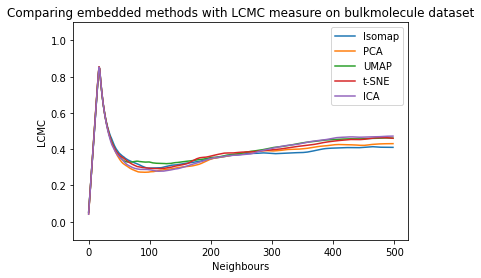

In [41]:
plt.plot(lcmc_isomap, label = 'Isomap')
plt.plot(lcmc_pca, label = 'PCA')
plt.plot(lcmc_UMAP, label = 'UMAP')
plt.plot(lcmc_tsne, label = 't-SNE')
plt.plot(lcmc_ica, label = 'ICA')
plt.ylim(-0.1,1.1)
plt.legend()
plt.title('Comparing embedded methods with LCMC measure on bulkmolecule dataset')
plt.ylabel('LCMC')
plt.xlabel('Neighbours')

Text(0.5, 0, 'Neighbours')

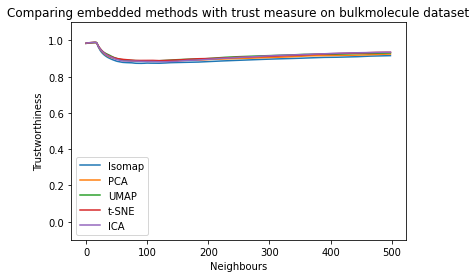

In [42]:
plt.plot(trust_isomap, label = 'Isomap')
plt.plot(trust_pca, label = 'PCA')
plt.plot(trust_UMAP, label = 'UMAP')
plt.plot(trust_tsne, label = 't-SNE')
plt.plot(trust_ica, label = 'ICA')
plt.ylim(-0.1,1.1)
plt.legend()
plt.title('Comparing embedded methods with trust measure on bulkmolecule dataset')
plt.ylabel('Trustworthiness')
plt.xlabel('Neighbours')

Text(0.5, 0, 'Neighbours')

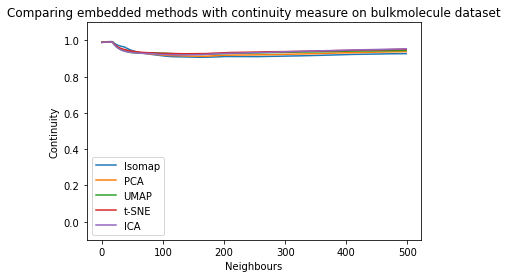

In [43]:
plt.plot(cont_isomap, label = 'Isomap')
plt.plot(cont_pca, label = 'PCA')
plt.plot(cont_UMAP, label = 'UMAP')
plt.plot(cont_tsne, label = 't-SNE')
plt.plot(cont_ica, label = 'ICA')
plt.ylim(-0.1,1.1)
plt.legend()
plt.title('Comparing embedded methods with continuity measure on bulkmolecule dataset')
plt.ylabel('Continuity')
plt.xlabel('Neighbours')

In [44]:
AUC_T1 = np.mean(trust_isomap)
AUC_C1 = np.mean(cont_isomap)
AUC_T2 = np.mean(trust_pca)
AUC_C2 = np.mean(cont_pca)
AUC_T3 = np.mean(trust_UMAP)
AUC_C3 = np.mean(cont_UMAP)
AUC_T4 = np.mean(trust_tsne)
AUC_C4 = np.mean(cont_tsne)
AUC_T5 = np.mean(trust_ica)
AUC_C5 = np.mean(cont_ica)




print("AUC of isomap Trust = ", AUC_T1)
print("AUC of isomap Cont = ", AUC_C1)
print("AUC of PCA Trust = ", AUC_T2)
print("AUC of PCA Cont = ", AUC_C2)
print("AUC of UMAP Trust = ", AUC_T3)
print("AUC of UMAP Cont = ", AUC_C3)
print("AUC of t-SNE Trust = ", AUC_T4)
print("AUC of t-SNE Cont = ", AUC_C4)
print("AUC of ICA Trust = ", AUC_T5)
print("AUC of ICA Cont = ", AUC_C5)

AUC of isomap Trust =  0.8984276741432125
AUC of isomap Cont =  0.9230415959786651
AUC of PCA Trust =  0.9080407009239332
AUC of PCA Cont =  0.929449514077972
AUC of UMAP Trust =  0.9146440600711606
AUC of UMAP Cont =  0.9369301443929835
AUC of t-SNE Trust =  0.9145300265438291
AUC of t-SNE Cont =  0.9410020815392589
AUC of ICA Trust =  0.9130777899155113
AUC of ICA Cont =  0.938852835956257


In [45]:
m = len(Q1)
QNN1 = np.zeros(m)
for k in range(m):    
        QNN1[k] = np.sum(Q1[:k+1,:k+1])/((k+1) * m)
        
Plot_QNN1 = QNN1[range(1,101)]

m = len(Q2)
QNN2 = np.zeros(m)
for k in range(m):    
        QNN2[k] = np.sum(Q2[:k+1,:k+1])/((k+1) * m)
       
Plot_QNN2 = QNN2[range(1,101)]

m = len(Q3)
QNN3 = np.zeros(m)
for k in range(m):    
        QNN3[k] = np.sum(Q3[:k+1,:k+1])/((k+1) * m)
       
Plot_QNN3 = QNN3[range(1,101)]

m = len(Q4)
QNN4 = np.zeros(m)
for k in range(m):    
        QNN4[k] = np.sum(Q4[:k+1,:k+1])/((k+1) * m)
       
Plot_QNN4 = QNN4[range(1,101)]

m = len(Q5)
QNN5 = np.zeros(m)
for k in range(m):    
        QNN5[k] = np.sum(Q5[:k+1,:k+1])/((k+1) * m)
       
Plot_QNN5 = QNN5[range(1,101)]

Text(0.5, 0, 'Neighbours')

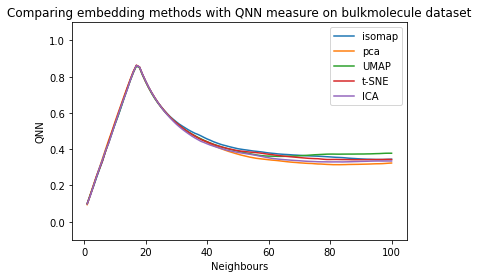

In [46]:
plt.plot(list(range(1, len(Plot_QNN1)+1)), Plot_QNN1, label = 'isomap')
plt.plot(list(range(1, len(Plot_QNN2)+1)), Plot_QNN2, label = 'pca')
plt.plot(list(range(1, len(Plot_QNN3)+1)), Plot_QNN3, label = 'UMAP')
plt.plot(list(range(1, len(Plot_QNN4)+1)), Plot_QNN4, label = 't-SNE')
plt.plot(list(range(1, len(Plot_QNN5)+1)), Plot_QNN5, label = 'ICA')
plt.ylim(-0.1,1.1)
plt.legend()
plt.title('Comparing embedding methods with QNN measure on bulkmolecule dataset')
plt.ylabel('QNN')
plt.xlabel('Neighbours')

In [47]:
AUC1 = np.mean(QNN1)
AUC2 = np.mean(QNN2)
AUC3 = np.mean(QNN3)
AUC4 = np.mean(QNN4)
AUC5 = np.mean(QNN5)

print("AUC of isomap is", AUC1)
print("AUC of pca is", AUC2)
print("AUC of UMAP is", AUC3)
print("AUC of t-SNE is", AUC4)
print("AUC of ICA is", AUC5)



AUC of isomap is 0.7745923794144108
AUC of pca is 0.7905891384197011
AUC of UMAP is 0.7999904849324586
AUC of t-SNE is 0.8085577760572115
AUC of ICA is 0.8097124927426743


In [48]:
kmax1 = np.argmax(lcmc_isomap)
kmax2 = np.argmax(lcmc_pca)
kmax3 = np.argmax(lcmc_UMAP)
kmax4 = np.argmax(lcmc_tsne)
kmax5 = np.argmax(lcmc_ica)

print("kmax of isomap is", kmax1)
print("kmax of pca is", kmax2)
print("kmax of UMAP is", kmax3)
print("kmax of t-SNE is", kmax4)
print("kmax of ICA is", kmax5)

kmax of isomap is 17
kmax of pca is 17
kmax of UMAP is 17
kmax of t-SNE is 17
kmax of ICA is 17


In [49]:
Qlocal1 = np.sum(QNN1[:kmax1+1])/(kmax1 + 1) 
Qglobal1 = np.sum(QNN1[kmax1:-1])/(m - kmax1 -1)

Qlocal2 = np.sum(QNN2[:kmax2+1])/(kmax2 + 1) 
Qglobal2 = np.sum(QNN2[kmax2:-1])/(m - kmax2 -1)

Qlocal3 = np.sum(QNN3[:kmax3+1])/(kmax3 + 1) 
Qglobal3 = np.sum(QNN3[kmax3:-1])/(m - kmax3 -1)

Qlocal4 = np.sum(QNN4[:kmax4+1])/(kmax4 + 1) 
Qglobal4 = np.sum(QNN4[kmax4:-1])/(m - kmax4 -1)

Qlocal5 = np.sum(QNN5[:kmax5+1])/(kmax5 + 1) 
Qglobal5 = np.sum(QNN5[kmax5:-1])/(m - kmax5 -1)

print("Qlocal of isomap =", Qlocal1)
print("Qglobal of isomap =", Qglobal1)

print("Qlocal of pca =", Qlocal2)
print("Qglobal of pca =", Qglobal2)

print("Qlocal of UMAP =", Qlocal3)
print("Qglobal of UMAP =", Qglobal3)

print("Qlocal of t-SNE =", Qlocal4)
print("Qglobal of t-SNE =", Qglobal4)

print("Qlocal of ICA =", Qlocal5)
print("Qglobal of ICA =", Qglobal5)

Qlocal of isomap = 0.4617237597348999
Qglobal of isomap = 0.7772707404116348
Qlocal of pca = 0.4688146692228303
Qglobal of pca = 0.7933459606756421
Qlocal of UMAP = 0.462154697333966
Qglobal of UMAP = 0.8028866939575464
Qlocal of t-SNE = 0.4647420452701966
Qglobal of t-SNE = 0.8115086117703815
Qlocal of ICA = 0.4620101899281479
Qglobal of ICA = 0.8126966015309611


### Quality metrics in 2D - Laplacian Eigenmap

In [50]:
start = time.perf_counter()
# Generate Spec embedding
K = 2
spec = SpectralEmbedding(n_components=K)
spec_embedding = spec.fit_transform(standardised_data)

end = time.perf_counter()
print(f"Processed the Spectral algorithm in {start-end:0.4f} seconds")

Processed the Spectral algorithm in -0.5515 seconds


In [51]:
import coranking
from coranking.metrics import trustworthiness, continuity, LCMC

Q1 = coranking.coranking_matrix(standardised_data, spec_embedding)
trust_pca = trustworthiness(Q1, min_k=1, max_k=500)
cont_pca = continuity(Q1, min_k=1, max_k=500)
lcmc_pca = LCMC(Q1, min_k=1, max_k=500)

Text(0.5, 0, 'Neighbours')

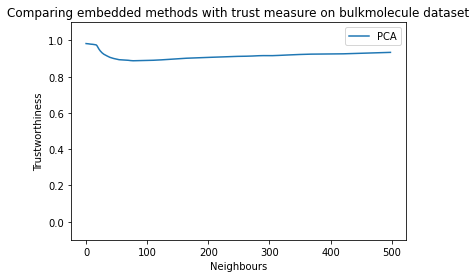

In [52]:
plt.plot(trust_pca, label = 'PCA')
plt.ylim(-0.1,1.1)
plt.legend()
plt.title('Comparing embedded methods with trust measure on bulkmolecule dataset')
plt.ylabel('Trustworthiness')
plt.xlabel('Neighbours')

Text(0.5, 0, 'Neighbours')

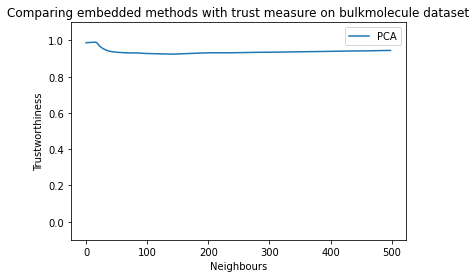

In [53]:
plt.plot(cont_pca, label = 'PCA')
plt.ylim(-0.1,1.1)
plt.legend()
plt.title('Comparing embedded methods with trust measure on bulkmolecule dataset')
plt.ylabel('Trustworthiness')
plt.xlabel('Neighbours')

Text(0.5, 0, 'Neighbours')

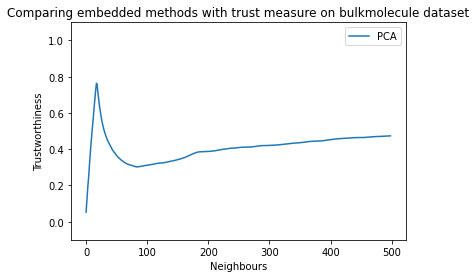

In [54]:
plt.plot(lcmc_pca, label = 'PCA')
plt.ylim(-0.1,1.1)
plt.legend()
plt.title('Comparing embedded methods with trust measure on bulkmolecule dataset')
plt.ylabel('Trustworthiness')
plt.xlabel('Neighbours')

In [55]:
AUC_T1 = np.mean(trust_pca)
AUC_C1 = np.mean(cont_pca)

print("AUC of PCA Trust = ", AUC_T1)
print("AUC of PCA Cont = ", AUC_C1)

AUC of PCA Trust =  0.9156471077260399
AUC of PCA Cont =  0.9377936001538475


In [56]:
m = len(Q1)
QNN1 = np.zeros(m)
for k in range(m):    
        QNN1[k] = np.sum(Q1[:k+1,:k+1])/((k+1) * m)
        
Plot_QNN1 = QNN1[range(1,101)]

In [57]:
AUC1 = np.mean(QNN1)

print("AUC of PCA is", AUC1)

AUC of PCA is 0.7987763425710086


In [58]:
kmax1 = np.argmax(lcmc_pca)

print("kmax of pca is", kmax1)

kmax of pca is 17


In [59]:
Qlocal1 = np.sum(QNN1[:kmax1+1])/(kmax1 + 1) 
Qglobal1 = np.sum(QNN1[kmax1:-1])/(m - kmax1 -1)

print("Qlocal of PCA =", Qlocal1)
print("Qglobal of PCA =", Qglobal1)

Qlocal of PCA = 0.4354434288705013
Qglobal of PCA = 0.8018541896994105


In [84]:
Q1 = coranking.coranking_matrix(standardised_data, pca_embedding)
Q2 = coranking.coranking_matrix(standardised_data, tsne_embedding3)
Q3 = coranking.coranking_matrix(standardised_data, isomap_embedding4)
Q4 = coranking.coranking_matrix(standardised_data, UMAP_embedding17)
Q5 = coranking.coranking_matrix(standardised_data, spec_embedding)


Text(0.5, 1.0, 'Isomap projection')

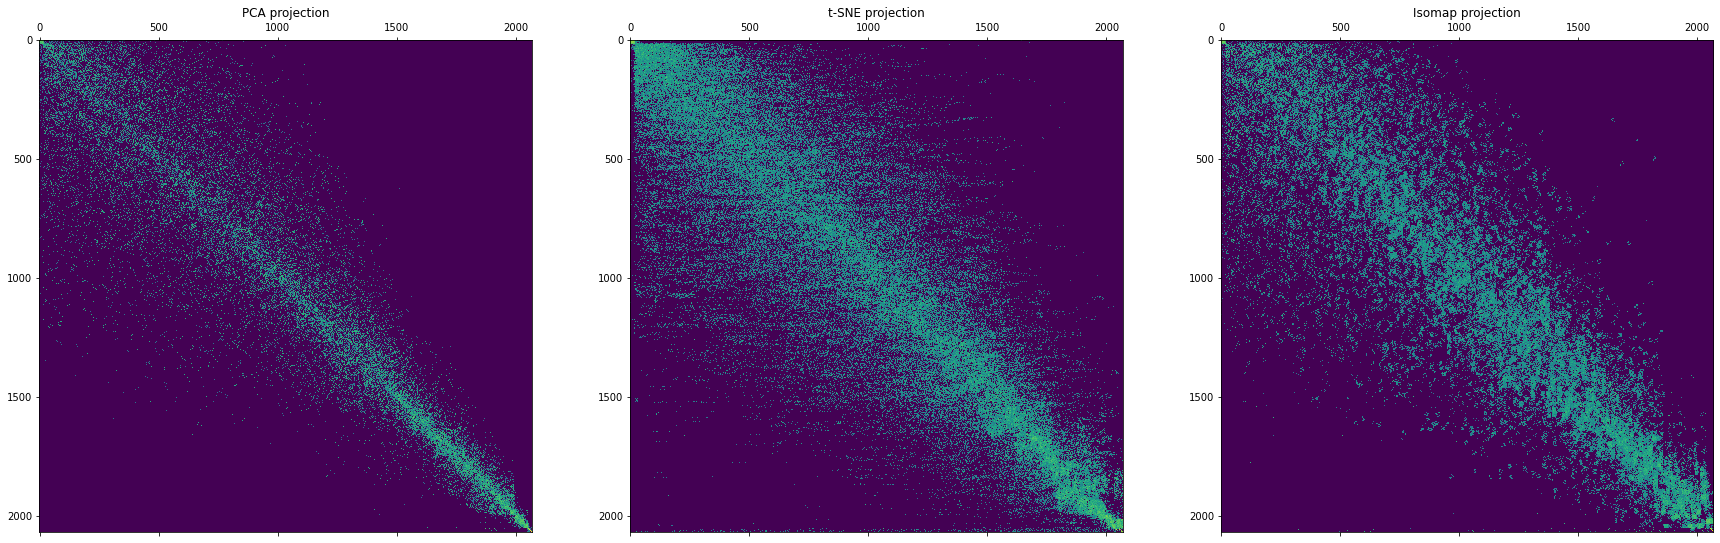

In [85]:
fig, axs = plt.subplots(figsize=(30,10), ncols = 3)
axs[0].matshow(np.log(Q1+1e-2))
axs[0].set_title('PCA projection')
axs[1].matshow(np.log(Q2+1e-2))
axs[1].set_title('t-SNE projection')
axs[2].matshow(np.log(Q3+1e-2))
axs[2].set_title('Isomap projection')

Text(0.5, 1.0, 'Laplacian projection')

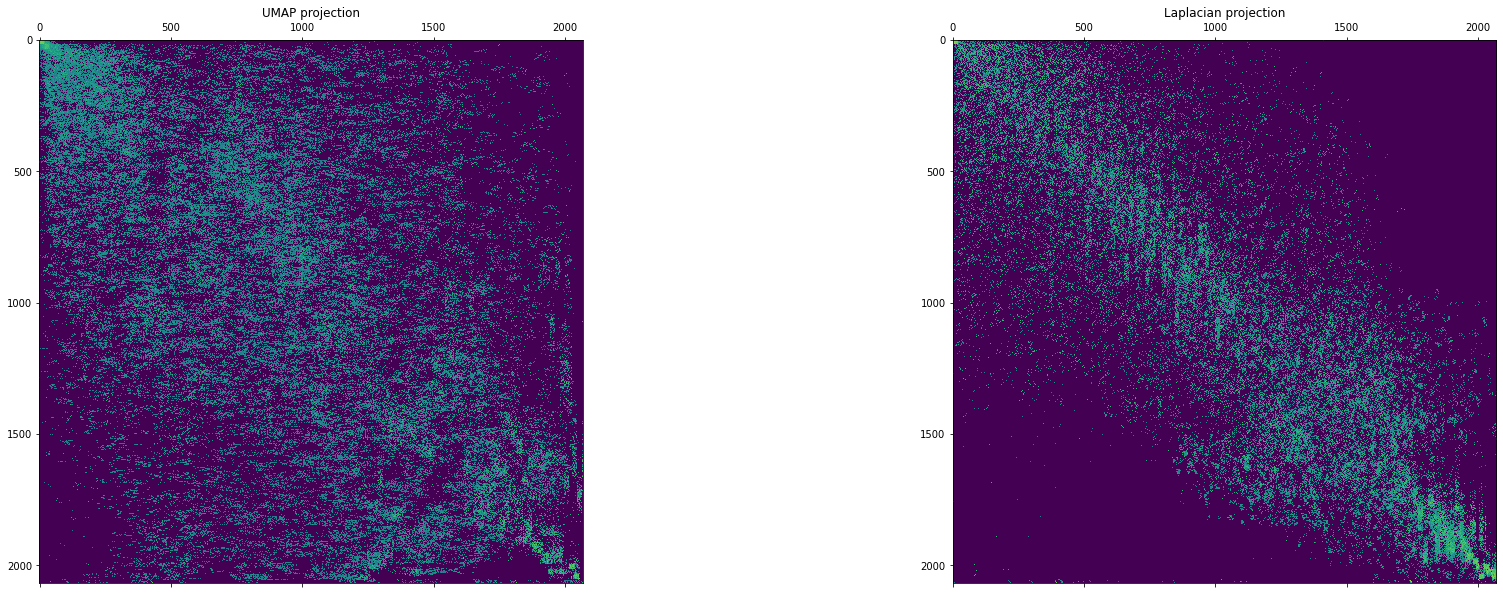

In [86]:
fig, axs = plt.subplots(figsize=(30,10), ncols = 2)
axs[0].matshow(np.log(Q4+1e-2))
axs[0].set_title('UMAP projection')
axs[1].matshow(np.log(Q5+1e-2))
axs[1].set_title('Laplacian projection')
